Lambda School Data Science

*Unit 2, Sprint 3, Module 1*

---


# Define ML problems

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your decisions.

- [ ] Choose your target. Which column in your tabular dataset will you predict?
- [ ] Is your problem regression or classification?
- [ ] How is your target distributed?
    - Classification: How many classes? Are the classes imbalanced?
    - Regression: Is the target right-skewed? If so, you may want to log transform the target.
- [ ] Choose your evaluation metric(s).
    - Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
    - Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
- [ ] Choose which observations you will use to train, validate, and test your model.
    - Are some observations outliers? Will you exclude them?
    - Will you do a random split or a time-based split?
- [ ] Begin to clean and explore your data.
- [ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?

If you haven't found a dataset yet, do that today. [Review requirements for your portfolio project](https://lambdaschool.github.io/ds/unit2) and choose your dataset.

Some students worry, ***what if my model isn't “good”?*** Then, [produce a detailed tribute to your wrongness. That is science!](https://twitter.com/nathanwpyle/status/1176860147223867393)

# Wrangle ML datasets (From 231 assignment)
[ ] Continue to clean and explore your data.

[ ] For the evaluation metric you chose, what score would you get just by guessing?

[ ] Can you make a fast, first model that beats guessing?

Lambda School Data Science

*Unit 2, Sprint 3, Module 3*

---


# Permutation & Boosting

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] If you haven't completed assignment #1, please do so first.
- [ ] Continue to clean and explore your data. Make exploratory visualizations.
- [ ] Fit a model. Does it beat your baseline? 
- [ ] Try xgboost.
- [ ] Get your model's permutation importances.

You should try to complete an initial model today, because the rest of the week, we're making model interpretation visualizations.

But, if you aren't ready to try xgboost and permutation importances with your dataset today, that's okay. You can practice with another dataset instead. You may choose any dataset you've worked with previously.

The data subdirectory includes the Titanic dataset for classification and the NYC apartments dataset for regression. You may want to choose one of these datasets, because example solutions will be available for each.


## Reading

Top recommendations in _**bold italic:**_

#### Permutation Importances
- _**[Kaggle / Dan Becker: Machine Learning Explainability](https://www.kaggle.com/dansbecker/permutation-importance)**_
- [Christoph Molnar: Interpretable Machine Learning](https://christophm.github.io/interpretable-ml-book/feature-importance.html)

#### (Default) Feature Importances
  - [Ando Saabas: Selecting good features, Part 3, Random Forests](https://blog.datadive.net/selecting-good-features-part-iii-random-forests/)
  - [Terence Parr, et al: Beware Default Random Forest Importances](https://explained.ai/rf-importance/index.html)

#### Gradient Boosting
  - [A Gentle Introduction to the Gradient Boosting Algorithm for Machine Learning](https://machinelearningmastery.com/gentle-introduction-gradient-boosting-algorithm-machine-learning/)
  - [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 8
  - _**[Gradient Boosting Explained](https://www.gormanalysis.com/blog/gradient-boosting-explained/)**_ — Ben Gorman
  - [Gradient Boosting Explained](http://arogozhnikov.github.io/2016/06/24/gradient_boosting_explained.html) — Alex Rogozhnikov
  - [How to explain gradient boosting](https://explained.ai/gradient-boosting/) — Terence Parr & Jeremy Howard

# Uploading Data Set

In [213]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('/Users/bradbrauser/Desktop/Data Science/MoviesOnStreamingPlatforms_updated.csv')

In [239]:
df.shape

(16744, 17)

# Which column in your tabular dataset will you predict, and how is your target distributed?

The dataset has two rating features - IMDb and Rotten Tomatoes.

IMDb is great for seeing what general audiences think of a movie. If you don’t care what the critics say and want to see what people like yourself think of a movie, then you should use IMDb. Just be aware that fans often skew the vote with 10-star ratings, which may inflate scores somewhat.

Rotten Tomatoes offers the best overall picture of whether a movie is worth seeing at a glance. If you only trust the opinions of top critics and just want to know if a movie is at least decent, you should use Rotten Tomatoes. While the Fresh/Rotten binary can oversimplify the often complex opinions of critics, it should still help you weed out lousy films.

My goal with this project is more in line with IMDb, as even though scores may be skewed a bit by fans of the movies, I still want to know what the public thinks, because it seems that more often than not critics do not always line up with the public opinion.

In [240]:
print(df['IMDb'].isnull().sum())
print(df['Rotten Tomatoes'].isnull().sum())

571
11586


Since the Rotten Tomatoes features has over 11,000 missing ratings, I'm going to just drop t

In [230]:
# Beginning to create target for model - getting the average of the
# IMDb and Rotten Tomatoes ratings
df['Rating'] = ((df['IMDb'] + df['Rotten Tomatoes']) / 2)
df['Rating'] = df['Rating'].astype(float)

df.head()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [227]:
def wrangle(df, thresh=500):
    df = df.copy()
    
    # Dropping movies made before 1942
    df.drop(df[df.Year < 1942].index, inplace=True)
    
    # Setting Title as index
    df.set_index(df['Year'], inplace = True)    
    
    # Changing "Rotten Tomatoes" to float
    df['Rotten Tomatoes'] = df['Rotten Tomatoes'].str.rstrip('%')
    df['Rotten Tomatoes'] = pd.to_numeric(df['Rotten Tomatoes'], downcast="float")
    df['Rotten Tomatoes'] = (df['Rotten Tomatoes'] / 10)
    
    # Replacing missing values in IMDb with Rotten Tomatoes and vice versa
    # if there is at least one non-null in either  
    df['Rotten Tomatoes'].fillna(df['IMDb'], inplace=True)
    df['IMDb'].fillna(df['Rotten Tomatoes'], inplace=True)
    
    # Dropping rows if their are nulls in both IMDb AND Rotten Tomatoes
    df.dropna(subset=['IMDb', 'Rotten Tomatoes'], how='all')
    
    # Beginning to create target for model - getting the average of the
    # IMDb and Rotten Tomatoes ratings
    df['Rating'] = ((df['IMDb'] + df['Rotten Tomatoes']) / 2)
    df['Rating'] = df['Rating'].astype(float)
    
#     # Creating conditions for grading scale based on Rating column
#     condition = [(df['Rating'] >= 9.0),
#               (df['Rating'] >= 8.0) & (df['Rating'] < 9.0),
#               (df['Rating'] >= 7.0) & (df['Rating'] < 8.0),
#               (df['Rating'] >= 6.0) & (df['Rating'] < 7.0),
#               (df['Rating'] < 6.0)]
    
#     # Creating grading scale
#     values = ['A', 'B', 'C', 'D', 'E']
    
#     # Creating new Rating colums
#     df['Rating'] = np.select(condition, values)
    
    # Dropping NaNs
    df = df.dropna()
    
    # Dropping unnecessary values
    df.drop(['Unnamed: 0', 'ID', 'Title', 'Type', 'ID', 'Year', 'IMDb', 
             'Rotten Tomatoes', 'Directors', 'Genres', 'Country', 'Language'], 
            axis=1, inplace=True)
    
    # Split label and feature matrix
    y = df['Rating']
    df.drop(['Rating'], axis=1, inplace=True)
    
    return df, y

X.head()

,Age,Netflix,Hulu,Prime Video,Disney+
Year,,,,,
2010,13+,1,0,0,0
1999,18+,1,0,0,0
2018,13+,1,0,0,0
1985,7+,1,0,0,0
1966,18+,1,0,1,0


In [228]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Wrangling
X, y = wrangle(df)

# Train test split on years movies were released
train, val  = train_test_split(train, train_size=0.8, test_size=0.2, stratify=train['Rating'], random_state=42)
train.shape, val.shape, test.shape

print(X.shape)
print(y.shape)

y_train.value_counts()

KeyError: 'Rating'

In [210]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score

In [194]:
# Building model 1
model1 = Pipeline([
    ('oe', OrdinalEncoder()),
    ('impute', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('classifier', RandomForestClassifier(criterion='entropy', 
                                          max_depth=50, n_estimators=200, 
                                          min_samples_leaf=1, 
                                          random_state=42))
])

# Fitting the model
model1.fit(X_train, y_train)

print('Training Accuracy:', model1.score(X_train, y_train))
print('Validation Accuracy:', model1.score(X_val, y_val))

Training Accuracy: 0.5465380249716232
Validation Accuracy: 0.4613914373088685


In [195]:
# Building model 2
model2 = Pipeline([
                  ('ohe', OneHotEncoder()),
                  ('impute', SimpleImputer()),
                  ('scaler', StandardScaler()),
                  ('classifier', RandomForestClassifier())
])

# Fitting the model
model2.fit(X_train, y_train)

print('Training Accuracy:', model2.score(X_train, y_train))
print('Validation Accuracy:', model2.score(X_val, y_val))

Training Accuracy: 0.5465380249716232
Validation Accuracy: 0.48107798165137616


In [196]:
# Model 3
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

model3 = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    SimpleImputer(), 
    StandardScaler(), 
    RandomForestClassifier(n_estimators = 10, min_samples_split = 40))

# Fitting the model
model3.fit(X_train, y_train)

print('Training Accuracy:', model3.score(X_train, y_train))
print('Validation Accuracy:', model3.score(X_val, y_val))

Training Accuracy: 0.5448354143019296
Validation Accuracy: 0.4938837920489297


In [198]:
# Model 5
model4 = make_pipeline(
  OrdinalEncoder(drop_invariant=True),
  SimpleImputer(strategy='median'),
  StandardScaler(),
  RandomForestClassifier(
      criterion='entropy',
      min_samples_split=3,
      max_depth=15,
      n_estimators= 200,
      n_jobs=1)
)
param_distributions = {
    'randomforestclassifier__criterion': ('gini','entropy'),
    'randomforestclassifier__max_depth' : (11, 12, 13, 14, 15),
    'randomforestclassifier__min_samples_split': (1,2,3),
}

search = RandomizedSearchCV(
    model4,
    param_distributions=param_distributions,
    n_iter=40,
    cv=7,
    scoring='accuracy',
    verbose = 30,
    return_train_score=True,
    n_jobs=4,
)

search.fit(X_train, y_train)

Fitting 7 folds for each of 30 candidates, totalling 210 fits


/Users/bradbrauser/opt/anaconda3/envs/unit2/lib/python3.7/site-packages/sklearn/model_selection/_search.py:282: UserWarning: The total space of parameters 30 is smaller than n_iter=40. Running 30 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done   2 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done   3 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done   4 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done   5 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   6 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   7 tasks      | elapsed:    1.9s
[Parallel(n_jobs=4)]: Done   8 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done   9 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:    2.3s
[Parallel(

[Parallel(n_jobs=4)]: Done 134 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 135 tasks      | elapsed:   11.8s
[Parallel(n_jobs=4)]: Done 136 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 137 tasks      | elapsed:   11.9s
[Parallel(n_jobs=4)]: Done 138 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 139 tasks      | elapsed:   12.2s
[Parallel(n_jobs=4)]: Done 140 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 141 tasks      | elapsed:   12.3s
[Parallel(n_jobs=4)]: Done 142 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 143 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 144 tasks      | elapsed:   12.6s
[Parallel(n_jobs=4)]: Done 145 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 146 tasks      | elapsed:   12.7s
[Parallel(n_jobs=4)]: Done 147 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 148 tasks      | elapsed:   12.8s
[Parallel(n_jobs=4)]: Done 149 tasks      | elapsed:   12.9s
[Parallel(n_jobs=4)]: Do

RandomizedSearchCV(cv=7,
                   estimator=Pipeline(steps=[('ordinalencoder',
                                              OrdinalEncoder(drop_invariant=True)),
                                             ('simpleimputer',
                                              SimpleImputer(strategy='median')),
                                             ('standardscaler',
                                              StandardScaler()),
                                             ('randomforestclassifier',
                                              RandomForestClassifier(criterion='entropy',
                                                                     max_depth=15,
                                                                     min_samples_split=3,
                                                                     n_estimators=200,
                                                                     n_jobs=1))]),
                   n_iter=40, n_jobs=4,
         

In [199]:
print('Cross-validation Best Score:', search.best_score_)

Cross-validation Best Score: 0.4857712009106431


In [200]:
print('Best Estimator:', search.best_params_)

Best Estimator: {'randomforestclassifier__min_samples_split': 3, 'randomforestclassifier__max_depth': 13, 'randomforestclassifier__criterion': 'gini'}


In [201]:
print('Best Model:', search.best_estimator_)

Best Model: Pipeline(steps=[('ordinalencoder',
                 OrdinalEncoder(cols=['Age'], drop_invariant=True,
                                mapping=[{'col': 'Age', 'data_type': dtype('O'),
                                          'mapping': 18+    1
7+     2
13+    3
all    4
16+    5
NaN   -2
dtype: int64}])),
                ('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=13, min_samples_split=3,
                                        n_estimators=200, n_jobs=1))])


In [202]:
from xgboost import XGBClassifier

model6 = make_pipeline(ce.OrdinalEncoder(),
                         XGBClassifier(n_estimators=100,
                                       random_state=42,
                                       n_jobs=-1)
)

model6.fit(X_train, y_train)

print('Training Accuracy:', pipeline.score(X_train, y_train))
print('Validation Accuracy:', pipeline.score(X_val, y_val))

Training Accuracy: 0.5391600454029511
Validation Accuracy: 0.5317278287461774


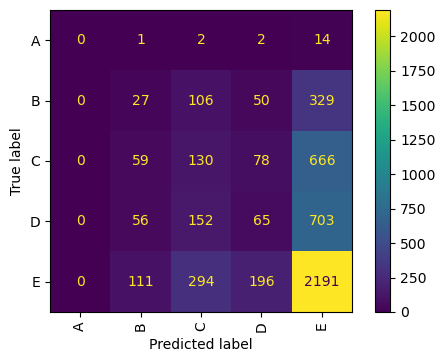

In [203]:
from sklearn.metrics import plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 100
plot_confusion_matrix(model6, X_val, y_val, values_format='.0f', xticks_rotation='vertical')

In [204]:
print(classification_report(y_val, y_pred))

ValueError: Found input variables with inconsistent numbers of samples: [5232, 2111]

In [ ]:
y_train.value_counts(normalize=True)